<a href="https://colab.research.google.com/github/splasherzz/food-allergen-detector/blob/main/project%20code/Project%20Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI for AI: Utilizing Artificial Intelligence for Allergen Identification in Food**

### **Group 2:**
Bonuan, Juan Antonio

Ramirez, Dean Carlo

Sabado, Julia Beatriz

Tiangco, Andrei


# **GitHub Repository**
For our project, we uploaded the dataset, project code in Jupyter Notebook, and web app codes (both frontend and backend) in our public Github repository named [food-allergen-detector](https://github.com/splasherzz/food-allergen-detector). With this, anyone can see for themselves the code and how we approached this problem, as well as run our web app locally on their devices. We also have our notebook publicly on [Google Colab](https://colab.research.google.com/drive/1fRyfwq4_TmldYD-slHBYG9k1nw0lXXr4?usp=sharing).

# **Project Summary**

This project aims to develop an AI model for allergen detection in food products using a multi-label classification approach. It will utilize separate Random Forest classifiers for each allergen class, treating them as independent binary classification tasks. This project addresses the limitations of traditional allergen detection methods, ensuring consumer safety and improving food allergen detection accuracy and food quality control processes. Using the "Food Ingredients and Allergens" dataset from Kaggle, the model will be trained to predict the presence of allergenic ingredients in different food products. The model will learn how to recognize patterns and associations between ingredients and allergens. The developed model will then be integrated into a web application for user-friendly allergen detection, where people with allergies can make informed decisions about the food they buy and consume. This project has the potential to benefit food manufacturers, the food service industry, regulatory bodies, and people with allergies, ultimately improving food safety and promoting informed food choices.

# **Data Collection**

We obtained the 2023 Kaggle dataset titled ["Food Ingredients & Allergens"](https://kaggle.com/datasets/uom190346a/food-ingredients-and-allergens) by Laksika Tharmalingam. We augmented data by manually adding 92 entries to the dataset, adding various food products and their allergen labels that we got from Google. The augmented dataset will then be used to train and test our AI model for food allergen detection.

## **Importing the Original Dataset**

The "Food Ingredients & Allergens" dataset is uploaded as a .csv file in our [GitHub repository](https://github.com/splasherzz/food-allergen-detector). This is imported and initialized in our notebook as `og_food`.
We set the content of `data` to the link of the raw dataset file, and then utilize pandas' `.read_csv()` to store the dataframe into `og_food`. Lastly, `.head()` displays the first five rows to visualize the dataframe.

In [ ]:
import io
import pandas as pd

# initializing the dataset
data = 'https://raw.githubusercontent.com/splasherzz/food-allergen-detector/main/datasets/%5BOriginal%5D%20Food%20Ingredients%20and%20Allergens.csv'
og_food = pd.read_csv(data)
og_food.head()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,Contains


## **Dataset Features**

Below is a table of the dataset features and their respective descriptions.

<table>
  <tr>
    <th>Column Name<th/>
    <th>Description<th/>
  <tr/>

  <tr>
    <td>Food Product<td/>
    <td>Name of the food product<td/>
  <tr/>
  <tr>
    <td>Main Ingredient<td/>
    <td>Defining or distinctive ingredient of the food product<td/>
  <tr/>
  <tr>
    <td>Sweetener<td/>
    <td>Substance added to food or drink to impart the flavor of sweetness<td/>
  <tr/>
  <tr>
    <td>Fat/Oil<td/>
    <td>Lipids made from plants, animals, or synthetic compounds used when frying, baking, and preparing foods<td/>
  <tr/>
  <tr>
    <td>Seasoning<td/>
    <td>Salt, herbs, or spices added to food to enhance the flavour<td/>
  <tr/>
  <tr>
    <td>Allergens<td/>
    <td>Any normally harmless substance that causes an immediate allergic reaction in a susceptible person<td/>
  <tr/>
  <tr>
    <td>Prediction<td/>
    <td>Anticipated outcome of the model<td/>
  <tr/>
<table/>

# **Data Preprocessing**

Before augmenting the dataset, we clean the original dataset by doing type formatting and handling null values and duplicate entries.

## **Type Formatting (Original Dataset)**

The table provided below summarizes the possible data types that we may encounter when using Pandas.

<table>
  <tr>
    <th>Data type<th/>
    <th>Description<th/>
  <tr/>

  <tr>
    <td>object<td/>
    <td>Text or mixed numeric and non-numeric values<td/>
  <tr/>
  <tr>
    <td>int64<td/>
    <td>Integer numbers<td/>
  <tr/>
  <tr>
    <td>float64<td/>
    <td>Floating point numbers<td/>
  <tr/>
  <tr>
    <td>bool<td/>
    <td>True/False values<td/>
  <tr/>
  <tr>
    <td>datetime64<td/>
    <td>Date and time values<td/>
  <tr/>
  <tr>
    <td>timedelta[ns]<td/>
    <td>Differences between two datetimes<td/>
  <tr/>
  <tr>
    <td>category<td/>
    <td>Finite list of text values<td/>
  <tr/>
<table/>

Using `dtypes` on the dataset, we observed that all columns had the data type `object`, which is described as "text or mixed numeric and non-numeric values." We then perform type formatting to ensure all our columns have the type `category`, as it fits the description of a "finite list of text values." It is also appropriate for our dataset since our columns are different categories of the food product. A loop that goes through the values of each column, in combination with `.astype('category')`, is utilized to convert the datatype.

In [ ]:
# performing type formatting to change all columns data types into "category"
for item in og_food:
  if og_food[item].dtype == object:
    og_food[item] = og_food[item].astype('category')

og_food.dtypes

Food Product       category
Main Ingredient    category
Sweetener          category
Fat/Oil            category
Seasoning          category
Allergens          category
Prediction         category
dtype: object

## **Handling Duplicates & Null Values**

Before dropping duplicates, we first check if there are null values in the dataset.

We print the number of missing values using `.isna()`, which returns a boolean same-sized object indicating if the values are `NaN`. These values get mapped to `True` values, while everything else gets mapped to `False` values. Thereafter, `.sum()` is used to get the total number of null values per column.

To find all rows that contain null values, we use the syntax `og_food[og_food.isna().any(axis=1)]`. Only one column had a null value and it was in the `Prediction` column.

In [ ]:
# handling null values
print("Total number of missing values in whole dataset:", og_food.isna().sum().sum())
print("\n")
print("Breakdown of which columns have missing values:\n", og_food.isna().sum())
print("\n")
print("Entry with null values:\n", og_food[og_food.isna().any(axis=1)])

Total number of missing values in whole dataset: 1


Breakdown of which columns have missing values:
 Food Product       0
Main Ingredient    0
Sweetener          0
Fat/Oil            0
Seasoning          0
Allergens          0
Prediction         1
dtype: int64


Entry with null values:
     Food Product Main Ingredient Sweetener Fat/Oil     Seasoning  \
338   Baked Ziti           Pasta      None  Cheese  Tomato sauce   

        Allergens Prediction  
338  Wheat, Dairy        NaN  


Upon manually checking the dataset for the row with null value (entry 338), it was a duplicate for the same entry with `Prediction` correctly filled up. Thus, we just drop this single row with null entry. This can be done using `.dropna()`, which drops missing values. By setting its `inplace` parameter to `True`, we specify that this is done on the current dataframe `og_food`.


We also drop the duplicates in the dataset, keeping only the first occurrence. `.drop_duplicates()` returns a dataframe with duplicate rows already removed. Setting the parameter `keep` to `'first'` makes the dataframe keep only the first occurence of the duplicate rows.

In [ ]:
# dropping entry with null value
og_food.dropna(inplace=True)

# handling & dropping duplicates
og_food.drop_duplicates(keep='first', inplace=True)
og_food.head()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,Contains
5,Ranch Dressing,Buttermilk,Sugar,Vegetable oil,"Garlic, herbs",Dairy,Contains
6,Caramel Popcorn,Popcorn,Sugar,Butter,Salt,Dairy,Contains


After dropping the duplicates and a row with a null value, we check for the current shape of the dataset. As shown below, there are only 308 entries left out of the initial 400. The attribute `.shape` returns a tuple containing the dataframe's number of rows and columns `(rows, columns)`.

In [ ]:
og_food.shape

(308, 7)

## **Augmenting the Dataset**
We augment the dataset by downloading the cleaned/preprocessed .csv file and manually adding 92 more entries to reach the same number of rows as prior to the deletion. To procure the data, we looked for random food products, their ingredients, and their allergen labels on Google.
We first made sure that there were no duplicates by searching the food product in the dataset before adding it. The commented lines below are used to save the cleaned dataset's CSV file.

In [ ]:
# # saving it as a CSV file
# temp_df = pd.DataFrame(og_food)
# temp_df.to_csv("[Augmented] Food Ingredients and Allergens.csv", index=False)

## **Importing the Augmented Dataset**

Then, we import the augmented dataset as `aug_food`, and verify if the dimensions are correct. The dataset is uploaded as a CSV file in our [GitHub repository](https://github.com/splasherzz/food-allergen-detector). We do the same process that we did when we imported the original dataset.

In [ ]:
data1 = 'https://raw.githubusercontent.com/splasherzz/food-allergen-detector/main/datasets/%5BAugmented%5D%20Food%20Ingredients%20and%20Allergens.csv'
aug_food = pd.read_csv(data1)

aug_food.head()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
1,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
2,Cheddar Cheese,Cheese,None,None,Salt,Dairy,Contains
3,Ranch Dressing,Buttermilk,Sugar,Vegetable oil,"Garlic, herbs",Dairy,Contains
4,Caramel Popcorn,Popcorn,Sugar,Butter,Salt,Dairy,Contains


After augmenting, we check for the current shape of the dataset. As shown below, the number of entries are back to the initial 400 due to the additional 92 entries.

In [ ]:
aug_food.shape

(400, 7)

## **Type Formatting (Augmented Dataset)**

We perform the same process that we did before to ensure all our columns have the type `category`, as it fits the description of a "finite list of text values." It is also appropriate for our dataset since our columns are different categories of the food product.

In [ ]:
# performing type formatting to change all columns data types into "category"
for item in aug_food:
  if aug_food[item].dtype == object:
    aug_food[item] = aug_food[item].astype('category')

aug_food.dtypes

Food Product       category
Main Ingredient    category
Sweetener          category
Fat/Oil            category
Seasoning          category
Allergens          category
Prediction         category
dtype: object

## **Lowercase Conversion**
Converting the values of the whole dataframe to lowercase is important for consistency and standardization. By doing this, we ensure that the data is consistent throughout, helping to avoid duplicate or mismatched entries.

`.applymap()` takes in a function as its parameter and applies it to the dataframe elementwise. In this case, we use a function that sets the value of `s` to lowercase using `.lower()` if it is a string; else, we do no changes to the value.

In [ ]:
aug_food = aug_food.applymap(lambda s: s.lower() if type(s) == str else s)
aug_food.head()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Prediction
0,almond cookies,almonds,sugar,butter,flour,"almonds, wheat, dairy",contains
1,chicken noodle soup,chicken broth,none,none,salt,"chicken, wheat, celery",contains
2,cheddar cheese,cheese,none,none,salt,dairy,contains
3,ranch dressing,buttermilk,sugar,vegetable oil,"garlic, herbs",dairy,contains
4,caramel popcorn,popcorn,sugar,butter,salt,dairy,contains


## **Converting Categorical Features through Categorical Data Encoding**

After augmenting the dataset, we do categorical data encoding. To convert the qualitative values `'Does not contain'` and `'Contains'` into numerical representation, we respectively map the prediction values to 0 and 1 using `.map()`. This is necessary for training our multilabel classification model, which requires numerical input for making predictions. To optimize the memory allocation of the dataform, we convert the datatype of the values from `int64` to `uint8` via `.astype('uint8')`.

In [ ]:
# mapping the prediction values to 0 or 1
aug_food['Prediction'] = aug_food['Prediction'].map({'contains': 1, 'does not contain': 0})

# changing the datatype from int64 to uint8
aug_food['Prediction'] = aug_food['Prediction'].astype('uint8')

# showing that the prediction values are now set to 0/1
aug_food['Prediction']

0      1
1      1
2      1
3      1
4      1
      ..
395    1
396    1
397    1
398    1
399    1
Name: Prediction, Length: 400, dtype: uint8

We separately obtain the dummies for the `Seasoning` and `Allergens` features to allow for appropriate handling of the non-atomic values. By splitting the multivalued cells into separate values via `get_dummies()`, we create individual binary columns for each seasoning and allergen. This ensures that the resulting dummy variables correctly represent the presence or absence of each specific seasoning or allergen in the dataset, rather than incorrectly representing concatenated strings.

To optimize the memory allocation of the dataform, we do the same process that we did when we mapped the `Prediction` values to 0s and 1s. The datatype is converted from `int64` to `uint8` with the help of a loop that goes through each value in each column.

We first obtain dummy variables for the `Allergens` column which results in binary columns representing the presence or absence of each unique allergen. We then put a prefix **Allergens_** for better readability.

In [ ]:
aug_allerg = aug_food['Allergens'].str.replace(' ', '').str.get_dummies(',')
aug_allerg = aug_allerg.add_prefix('Allergens_')

# changing the datatype from int64 to uint8
for c in aug_allerg.columns:
  if aug_allerg[c].dtype == 'int64':
    aug_allerg[c] = aug_allerg[c].astype('uint8')

aug_allerg.head()

,Allergens_alcohol,Allergens_almonds,Allergens_anchovies,Allergens_beef,Allergens_calamari,Allergens_celery,Allergens_chicken,Allergens_cocoa,Allergens_coconut,Allergens_crab,...,Allergens_oats,Allergens_peanuts,Allergens_pinenuts,Allergens_pork,Allergens_rice,Allergens_shellfish,Allergens_shrimp,Allergens_soybeans,Allergens_strawberries,Allergens_wheat
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Secondly, we obtain dummy variables separately for the `Seasoning` column which results in binary columns representing the presence or absence of each unique allergen. We also put a prefix **Seasoning_** for better readability.

In [ ]:
aug_season = aug_food['Seasoning'].str.replace(' ', '').str.get_dummies(',')
aug_season = aug_season.add_prefix('Seasoning_')

# changing the datatype from int64 to uint8
for c in aug_season.columns:
  if aug_season[c].dtype == 'int64':
    aug_season[c] = aug_season[c].astype('uint8')

aug_season.head()

,Seasoning_alfredosauce,Seasoning_almondmilk,Seasoning_almonds,Seasoning_apple,Seasoning_applecider,Seasoning_applejuice,Seasoning_arboriorice,Seasoning_avocado,Seasoning_bacon,Seasoning_bakingpowder,...,Seasoning_vegetablebroth,Seasoning_vegetableoil,Seasoning_vegetables,Seasoning_vinaigrette,Seasoning_vinegar,Seasoning_walnuts,Seasoning_wheatflour,Seasoning_yeast,Seasoning_yogurt,Seasoning_zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The remaining columns of the food allergen dataframe, excluding `Allergens` and `Seasoning`, are transformed into dummy variables.

In [ ]:
aug_food.drop(['Seasoning','Allergens'], axis=1, inplace=True)
# performing one-hot encoding on categorical columns
aug_food = pd.get_dummies(aug_food, drop_first=True)

# showing the dataset
aug_food.head()

,Prediction,Food Product_aloo gobi,Food Product_aloo paratha,Food Product_apple,Food Product_apple cider,Food Product_apple crisp,Food Product_apple pie,Food Product_apple sauce,Food Product_apple tart,Food Product_arabic fattoush,...,Fat/Oil_peanut oil,Fat/Oil_pesto sauce,Fat/Oil_sesame oil,Fat/Oil_sour cream,Fat/Oil_soy sauce,Fat/Oil_vegetable oil,Fat/Oil_water,Fat/Oil_whipped cream,Fat/Oil_yogurt,"Fat/Oil_yogurt (milk, cultures)"
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Finally, we combine the three dataframes together into the desired single encoded dataframe using the `pd.concat()` method. This consolidated dataframe can then be used for subsequent modeling. Lastly, we then move the `Prediction` column at the last column.

In [ ]:
# Join all columns using pd.concat()
aug_food = pd.concat([aug_food, aug_season, aug_allerg], axis=1)

# Moving the 'Prediction' column to the last position
aug_food = aug_food[[col for col in aug_food.columns if col != 'Prediction'] + ['Prediction']]

# Display the updated DataFrame
aug_food.head()

,Food Product_aloo gobi,Food Product_aloo paratha,Food Product_apple,Food Product_apple cider,Food Product_apple crisp,Food Product_apple pie,Food Product_apple sauce,Food Product_apple tart,Food Product_arabic fattoush,Food Product_arancini,...,Allergens_peanuts,Allergens_pinenuts,Allergens_pork,Allergens_rice,Allergens_shellfish,Allergens_shrimp,Allergens_soybeans,Allergens_strawberries,Allergens_wheat,Prediction
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## **Preprocessed Dataset Features**

The data features in the preprocessed dataset represent different food products such as "Aloo Gobi" and "Apple Cider." These features are stored as unsigned 8-bit integers (`uint8`). We use `uint8` for efficient memory usage as the binary values of the features can be accommodated within this range (decimal values 0-255).

We use the attribute `.dtypes` to show the datatype of the values in each column of the dataframe.

In [ ]:
aug_food.dtypes

Food Product_aloo gobi       uint8
Food Product_aloo paratha    uint8
Food Product_apple           uint8
Food Product_apple cider     uint8
Food Product_apple crisp     uint8
                             ...  
Allergens_shrimp             uint8
Allergens_soybeans           uint8
Allergens_strawberries       uint8
Allergens_wheat              uint8
Prediction                   uint8
Length: 764, dtype: object

# **Data Modeling**

After cleaning and preprocessing the data, we can now proceed to modeling the data using multi-label classification and Random Forest Classifier.

## **Training the Model**

<!-- We used a **Random Forest Classifier** for classifying the dataset due to its ability to handle high-dimensional categorical data and capture complex interactions. Given that our dataset contains a lot of features, using Random Forest as our classifier makes sense especially since it is known for its robustness to noisy or outlier data points.

Moreover, RFC is known for its capability to handle non-linear relationships and feature importance estimation. Since predicting allergens based only on allergens can produce complex and non-linear interactions, Random Forest's ensemble approach allows it to capture these non-linearities effectively, making it suitable for our project. -->

**Random Forest** is a commonly used machine learning model that is often effective in handling high-dimensional data (Zhang et. al, 2023), which is particularly relevant to our dataset since it encompasses a large number of food products and their allergens. It is a combination of one or more hierarchical predictive models called decision trees, yielding the modal class as the output for the classification task (Bahel, Pillai & Malhotra, 2020). Recently, the study about oral food challenges demonstrated that the Random Forest Classifier achieved the best performance in terms of the Area Under a Curve metric for each food allergen (Zhang et. al, 2023).

Thus, we begin our data modeling by instantiating a **random forest classifier**, an ensemble-based machine learning algorithm commonly used for classification tasks. The classifier is configured as follows:
- **20** decision trees
- random seed of **42**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20, random_state=42)

We assign the variable `X` to the `aug_food` dataframe with the `Prediction` column dropped, representing the input features. Similarly, the variable `y` is assigned to the `Prediction` column, representing the target variable.

In [ ]:
from sklearn.model_selection import train_test_split

# assigning the input features and prediction values
X = aug_food.drop('Prediction', axis = 1)
y = aug_food['Prediction']

The next step is to split the data into training and testing subsets via the `train_test_split` function. The split is performed such that 70% of the data is assigned to the training set, while 30% is assigned to the testing set. Subsequently, the X train and Y train subsets are fitted using the Random Forest Classifier.

In [ ]:
# splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
# fitting the subsets
classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=42)

## **Saving the Model**



The last step is to save the model pickle file using pickle's `.dump()`. This can then be loaded in the webapp to predict results.

In [ ]:
import pickle

filename = "model.pickle"

# save model
# pickle.dump(classifier, open(filename, "wb"))

# **Results**

## **Comparison of Random Forest Classification Models with Original and Augmented Datasets**

In this project, we compare the performance of **two Random Forest classification models** using different datasets: the original dataset and an augmented dataset. The goal is to evaluate the impact of data augmentation on the model's predictive accuracy and robustness.

The **first model** was trained on the original [**Food Ingredients and Allergens**](https://www.kaggle.com/datasets/uom190346a/food-ingredients-and-allergens) dataset from Kaggle.com, which represents the real-world data collected for the classification task. We will refer to this as **Medley's model**. Upon preprocessing, we discovered that the dataset contained duplicate entries and null values. After cleaning the dataset, the rows decreased from 400 to 308. This can potentially lead to overfitting and suboptimal generalization.

The **second model**, however, utilized an augmented dataset generated by applying various data augmentation techniques to the original data. These techniques include the following:

*   Type formatting
*   Null and duplicate values dropping
*   Adding more entries, increasing the number of rows from 308 to 400
*   Lowercase conversion
*   Categorical data encoding

This effectively increases the robustness, diversity and size of the dataset.

## **Medley's Random Forests Model Discussion**

This model was provided by **DANIELA MEDLEY** in the Code section of `Food Ingredients and Allergens` as [Food Ingredients - Pandas and Random Forests](https://www.kaggle.com/code/danielamedley/food-ingredients-pandas-and-random-forests). It utilized random forests classification to train a prediction model using the original dataset. Below is a brief discussion on how they approached preprocessing and model training.

### **Importing the Original Dataset**
First, they imported and read the original dataset as `df`. This is saved as `[Original] Food Ingredients and Allergens.csv` in our reposiitory.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/splasherzz/food-allergen-detector/main/datasets/%5BOriginal%5D%20Food%20Ingredients%20and%20Allergens.csv')

### **Converting Categorical Features**

The author did categorical data encoding by converting categorical variable into dummy/indicator variables using `.get_dummies()`. This was run through each column except the `Prediction` column. The variable dummies were saved to their respective variables. Their corresponding columns were then dropped from the dataframe to give way to map the `Prediction` values later.

In [ ]:
# getting the dummy variables
food = pd.get_dummies(df['Food Product'],drop_first=True)
ingr = pd.get_dummies(df['Main Ingredient'],drop_first=True)
sweet = pd.get_dummies(df['Sweetener'],drop_first=True)
fat = pd.get_dummies(df['Fat/Oil'],drop_first=True)
seas = pd.get_dummies(df['Seasoning'],drop_first=True)
aller = pd.get_dummies(df['Allergens'],drop_first=True)

# dropping the columns
df.drop(['Food Product','Main Ingredient','Sweetener','Fat/Oil','Seasoning','Allergens'],axis=1,inplace=True)

The code below is used to create a function `transform_pred` that maps the `Prediction` values such that `Contains` and `Does not contain` values are set to 1s and 0s respectively. Then, they used `.apply()`, which contains the function as a parameter, to the `Prediction` values.

In [ ]:
# creating a mapping function for the prediction values
def transform_pred (item):
    if item == 'Contains':
        return 1
    else:
        return 0

# apply the function to prediction values
df['Prediction'] = df['Prediction'].apply(transform_pred)
df['Prediction']

0      1
1      1
2      1
3      1
4      1
      ..
394    1
395    1
396    1
397    1
398    1
Name: Prediction, Length: 399, dtype: int64

The author merged the dummy features that were processed earlier, with the new Prediction row using `pd.concat()`.

In [ ]:
df = pd.concat([food,ingr,sweet,fat,seas,aller,df],axis=1)
df.head()

,Aloo Gobi,Aloo Paratha,Apple,Apple Cider,Apple Crisp,Apple Pie,Avocado Toast,BBQ Ribs,Bacon-Wrapped Shrimp,Baked Apple,...,Soybeans,"Soybeans, Fish",Wheat,"Wheat, Dairy","Wheat, Dairy, Alcohol","Wheat, Dairy, Cocoa","Wheat, Dairy, Eggs","Wheat, Dairy, Nuts","Wheat, Pork, Dairy",Prediction
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### **Training the Model**

After preprocessing the dataset, the model was trained using a Random Forest Classifier. This classifier was saved as `rfc`.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators = 200, random_state=10)

They assigned the variable `X` to the `aug_food` dataframe with the `Prediction` column dropped, representing the input features. Similarly, the variable `y` is assigned to the `Prediction` column, representing the target variable.
The data was split into training and testing subsets via the `train_test_split` function. The split was performed such that 70% of the data is assigned to the training set, while 30% is assigned to the testing set. Subsequently, the X train and Y train subsets were fitted using the Random Forest Classifier.

In [ ]:
from sklearn.model_selection import train_test_split

# assigning the input features and prediction values
X2 = df.drop('Prediction', axis = 1)
y2 = df['Prediction']

# splitting the data
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2, test_size=0.3)

# fitting the train subsets
rfc.fit(X2_train,y2_train)

RandomForestClassifier(n_estimators=200, random_state=10)

## **Performance Comparison**

### **Accuracy Score**
We compare the accuracy of the two models below using the method `.score()`. This utilizes `X_test` to create predictions in the background and uses those predictions to determine the testing accuracy score. Take note that these values change with the random state of the classifier. To solve the changing values, we perform cross validation next.

In [ ]:
classifier_score = classifier.score(X_test, y_test)
rfc_score = rfc.score(X2_test, y2_test)

print("Accuracy score of our model:", classifier_score)
print("Accuracy score of Medley's model:", rfc_score)

Accuracy score of our model: 0.9916666666666667
Accuracy score of Medley's model: 0.9833333333333333


### **Cross-Validation**
To further validate the results, we perform cross-validation in order to assess our model's performance across multiple train-test splits, providing a more comprehensive understanding of its generalization capabilities.

We can do this by using Sklearn's `cross_val_score` with 30 random states to get the cross-validation score of the model. We then print out the generated values' mean and standard deviation to get an overview of the accuracy of the model.

From the results below, we got a high mean score, indicating that the model consistently performs well across different iterations. Moreover, the low standard deviation result gives us an overview of the stability of the model across all iterations and how it has less variability across different folds.

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(classifier, X_train, y_train, cv=30)
scores2 = cross_val_score(rfc, X2_train, y2_train, cv=30)

# Print the cross-validation scores of our model
print("Our Model:\n")
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())
print("Standard Deviation:", scores.std())
print("\n")

# Print the cross-validation scores of Medley's model
print("Medley's Model:\n")
print("Cross-Validation Scores:", scores2)
print("Mean Score:", scores2.mean())
print("Standard Deviation:", scores2.std())

Our Model:

Cross-Validation Scores: [0.9        1.         1.         0.9        1.         1.
 1.         0.9        1.         1.         1.         1.
 0.88888889 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]
Mean Score: 0.9862962962962963
Standard Deviation: 0.03498186871146185


Medley's Model:

Cross-Validation Scores: [0.9        1.         1.         1.         1.         1.
 1.         0.9        1.         1.         1.         1.
 1.         0.88888889 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.88888889 1.         1.         1.         1.         0.88888889]
Mean Score: 0.9822222222222223
Standard Deviation: 0.03981438414926427


Looking at the results of the cross-validation above, we can see that the mean accuracy scores of these two models are very similar to each other. However, we can also witness the difference between their mean score and the standard deviation. Using 10 random states, our model got a very similar yet slightly higher mean score compared to Medley's. This is the same when we compare the standard deviation of these models. Medley's model, however, got a higher value. Hence, the accuracy scores that it produces are more spread out with regards to the mean.

### **Confusion Matrix**
The prediction summary is shown as a confusion matrix using sklearn's `confusion_matrix`. It displays the number of accurate and wrong predictions made for each class.

<table>
  <tr>
    <th>Values<th/>
    <th>Description<th/>
  <tr/>

  <tr>
    <td>True Positives (TP)<td/>
    <td>The number of instances that were correctly predicted as positive (class 1) by the model. In binary classification, this represents the cases where the model correctly identifies the positive class.<td/>
  <tr/>
  <tr>
    <td>True Negatives (TN)<td/>
    <td>The number of instances that were correctly predicted as negative (class 0) by the model. In binary classification, this represents the cases where the model correctly identifies the negative class.<td/>
  <tr/>
  <tr>
    <td>False Positives (FP)<td/>
    <td>The number of instances that were incorrectly predicted as positive by the model, while the actual class is negative. In binary classification, this represents the cases where the model falsely identifies the positive class (Type I error).<td/>
  <tr/>
  <tr>
    <td>False Negatives (FN)<td/>
    <td>The number of instances that were incorrectly predicted as negative by the model, while the actual class is positive. In binary classification, this represents the cases where the model misses or fails to identify the positive class (Type II error).<td/>
  <tr/>
<table/>

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# getting the confusion matrix of our model
pred = classifier.predict(X_test)
print("Our Model's Confusion Matrix: \n", confusion_matrix(y_test,pred))
print('\n')

# getting the confusion matrix of Medley's
pred2 = rfc.predict(X2_test)
print("Medley's Model's Confusion Matrix: \n", confusion_matrix(y2_test,pred2))

Our Model's Confusion Matrix: 
 [[31  0]
 [ 1 88]]


Medley's Model's Confusion Matrix: 
 [[38  0]
 [ 2 80]]


Overall, both models performed well, achieving a high number of true positive and true negative predictions. However, when the code is run, we can see that there is a difference between the number of false positives (FPs) and the false negatives (FNs). In this instance, Medley's model's total number of FPs and FNs are always more than our model's.

### **Classification Report**


A classification report provides a comprehensive evaluation of the performance of a classification model, specifically in the context of Random Forests. It summarizes various metrics that assess the model's ability to classify instances accurately across different classes or categories.

The classification report typically includes the following key metrics for each class:
<table>
  <tr>
    <th>Metrics<th/>
    <th>Description<th/>
  <tr/>

  <tr>
    <td>Precision<td/>
    <td>Precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive. It indicates the model's ability to avoid false positives, i.e., instances incorrectly classified as positive.<td/>
  <tr/>
  <tr>
    <td>Recall (Sensitivity or True Positive Rate)<td/>
    <td>Recall calculates the proportion of correctly predicted positive instances out of all actual positive instances. It measures the model's ability to capture true positives, thus avoiding false negatives, i.e., instances incorrectly classified as negative.<td/>
  <tr/>
  <tr>
    <td>F1-score<td/>
    <td>The F1-score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall, providing a more comprehensive assessment of the model's overall performance.<td/>
  <tr/>
  <tr>
    <td>Support<td/>
    <td>Support represents the number of instances belonging to each class in the test dataset. It gives an indication of the distribution of instances across different classes.<td/>
  <tr/>
<table/>

In [ ]:
print("Our Model:")
print('Classification Report: \n', classification_report(y_test,pred))

print("Medley's Model:")
print('Classification Report: \n', classification_report(y2_test,pred2))

Our Model:
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.99      0.99        89

    accuracy                           0.99       120
   macro avg       0.98      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

Medley's Model:
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        38
           1       1.00      0.98      0.99        82

    accuracy                           0.98       120
   macro avg       0.97      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120



**Our Model's classification report showcases strong performance metrics for both classes:**

**For class 0:**

1.   **Precision:** 97% of instances predicted as class 0 were correct.
2.   **Recall:** The model captured all (100%) instances belonging to class 0.
3.   **F1-score:** 0.98, demonstrating a balanced performance between precision and recall.


**For class 1:**


1. **Precision:** 100% of instances predicted as class 1 were correct.
2. **Recall:** The model accurately identified 99% of instances belonging to class 1.
3. **F1-score:** 0.99, reflecting a high level of precision and recall balance.


The overall accuracy of our Model is 0.99, indicating that it correctly classified 99% of instances in the test dataset.


**Medley's Model exhibited slightly lower performance metrics:**


The overall accuracy of Medley's model is lower than our model's, indicating that it correctly classified less instances in the test dataset.

In summary, our Model achieved higher overall accuracy (`0.99`) and **slightly better performance metrics** (`precision`, `recall`, and `F1-score`) compared to Medley's Model. Our Model demonstrated superior accuracy and precision in predicting class 0, while both models had comparable performance in predicting class 1.

### **Training and Testing Set Scores**

We also compare the accuracy scores of the two models using the training set, and the testing set. This can be done using sklearn's `accuracy_score()`.

In [ ]:
from sklearn.metrics import accuracy_score

print("Our Model")
# evaluating our model's performance on the training set
train_predictions = classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)

# evaluating our model's performance on the validation set
test_predictions = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Testing Accuracy:", test_accuracy)
print("\n")

print("Medley's Model")
# evaluating Medley's model's performance on the training set
train_predictions2 = rfc.predict(X2_train)
train_accuracy2 = accuracy_score(y2_train, train_predictions2)
print("Training Accuracy:", train_accuracy2)

# evaluating Medley's model's performance on the validation set
test_predictions2 = rfc.predict(X2_test)
test_accuracy2 = accuracy_score(y2_test, test_predictions2)
print("Testing Accuracy:", test_accuracy2)

Our Model
Training Accuracy: 1.0
Testing Accuracy: 0.9916666666666667


Medley's Model
Training Accuracy: 0.996415770609319
Testing Accuracy: 0.9833333333333333


**Our model** achieved a `training accuracy` of `1.0`, indicating that it perfectly predicted the labels of the training dataset.

When tested on unseen data, our model demonstrated an impressive `testing accuracy` of `0.9917` (or **99.17%**). This indicates that our model generalized well to the test dataset and was able to accurately classify instances it had not encountered during training. With such high testing accuracy, our Model showcases strong predictive capabilities and can be considered reliable in making accurate predictions for new and unseen instances.

On the other hand, **Medley's Model** achieved a `training accuracy` that is very close `1.0`, similar to our Model. This suggests that Medley's Model also learned the patterns and features present in the training data and accurately predicted the labels during training.

However, when evaluated on the test dataset, Medley's Model achieved a lower accuracy score, although this is still a high value. This indicates that Medley's model might have experienced a slight decrease in performance when exposed to new and unseen instances compared to our model.

### **ROC (Receiver Operating Characteristic) Curve**

We also plot the **ROC (Receiver Operating Characteristic)** curve, which is created by plotting the true positive rate against the false positive rate at different classification thresholds. Due to this, we are able to assess the classifier's performance in accurately identifying food products that contain allergens and those that do not contain allergens. Here we use the same Random Forest classifier to generate predicted probabilities (`.predict_proba`) for the testing data `y_pred`.

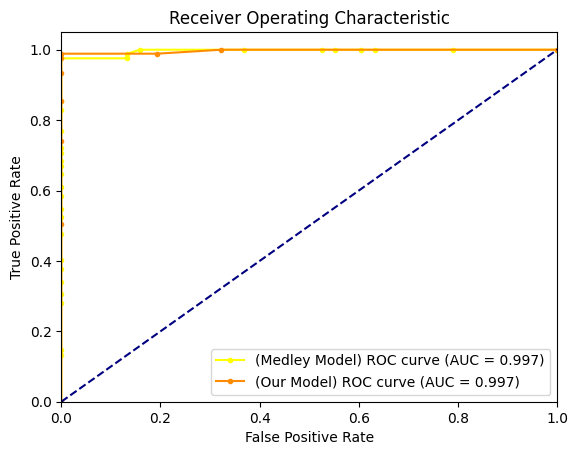

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# generating predictions for the testing data using our model
y_pred = classifier.predict_proba(X_test)[:, 1]  # assuming binary classification
# generating predictions for the testing data using Medley's model
y2_pred = rfc.predict_proba(X2_test)[:, 1]  # assuming binary classification


# computing the false positive rate (FPR), true positive rate (TPR), and thresholds of our model
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# computing the false positive rate (FPR), true positive rate (TPR), and thresholds of Medley's model
fpr2, tpr2, thresholds2 = roc_curve(y2_test, y2_pred)


# calculating the area under the ROC curve (AUC) (our model)
roc_auc = auc(fpr, tpr)
# calculating the area under the ROC curve (AUC) (Medley's model)
roc_auc2 = auc(fpr2, tpr2)

# plotting the ROC curve
plt.figure()
plt.plot(fpr2, tpr2, color='yellow', marker='.', label='(Medley Model) ROC curve (AUC = %0.3f)' % roc_auc2)
plt.plot(fpr, tpr, color='darkorange', marker='.', label='(Our Model) ROC curve (AUC = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The `roc_curve` function computes the false positive rate (FPR), true positive rate (TPR), and thresholds based on the predicted probabilities and the true labels (y_test). The `auc` function calculates the area under the ROC curve (AUC). Finally, the ROC curve is plotted using `matplotlib.pyplot`, displaying the AUC value and the diagonal reference line representing random guessing.

Our model's nearly horizontal line observed in the ROC curve, particularly at or close to the `y-value` of `1.0`, implies that the classifier is consistently predicting positive instances (food products containing allergens) regardless of the classification threshold used.

Moreover, the Medley model's initial value is lower compared to our model indicates that at a lower threshold, the Medley model captures a significant amount of False Positives compared to the True Positives. However, the increase in the threshold made the model more conservative in classifying positives, and thus led to the rise in value indicating less False Positives (lower FPR) yet still capturing True Positives (higher TPR) at a consistent rate.

Lastly, the AUC value of our Model is shown to be higher than the Medley model, indicating that our model has a **better classification performance** than the latter model. This means that our model distinguishes the positives and the negatives better compared to the Medley model.

### **Precision-Recall Curve**
We also check the precision-recall curve to examine the **tradeoff between precision and recall** for various thresholds. The curve illustrates the relationship between these two metrics, with a higher area under the curve indicating both high precision and high recall.

The horizontal line at a precision value of 1 approaching the point `(1,1)` indicates that the classifier is consistently identifying positive instances (e.g., food products containing allergens) with both high precision (low false positive rate) and high recall (low false negative rate).

Note that the curves of both our and Medley's models are very similar. This is because of the identical precision and recall values. However, we can still observe a decline in the precision of Medley's model  once the value of recall gets closer to `1.0`. On the other hand, the precision of our model is consistent until it reaches the highest recall value.

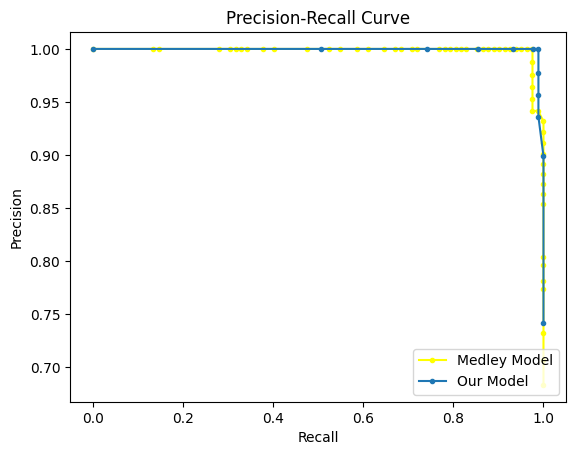

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# assuming you have the true labels (y_true) and predicted probabilities for positive class (y_pred_probs)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)  # our model
precision2, recall2, thresholds2 = precision_recall_curve(y2_test, y2_pred)  # Medley's model

# plotting the Precision-Recall curve
plt.plot(recall2, precision2, marker='.', color='yellow', label='Medley Model') # Medley's model
plt.plot(recall, precision, marker='.', label = 'Our Model') # our model
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

### **Feature Importance**

Meanwhile, we also analyze feature importances to determine the relative importance of each feature in influencing the system's predictions. Most notably is the the presence/absence of the `Allergens_none` feature being the **most important factor** for determining the predictions in the food allergen detection system, with the highest importance score. This suggests that **whether a food product is labelled to contain any allergens or not has a significant impact on the classification outcome.**

When training the model, if a food product is said to not contain any allergens, it is likely to be classified as safe for individuals with food allergies. Therefore, the absence of allergens becomes a crucial feature in making accurate predictions.

In [ ]:
pd.Series(classifier.feature_importances_, index=X.columns).sort_values(ascending=False).head(20)

Allergens_none               0.430382
Allergens_dairy              0.119171
Allergens_wheat              0.027639
Fat/Oil_butter               0.016573
Allergens_fish               0.016074
Allergens_eggs               0.014491
Allergens_pork               0.013674
Allergens_soybeans           0.013080
Seasoning_herbs              0.010413
Fat/Oil_olive oil            0.010289
Sweetener_none               0.010202
Allergens_shellfish          0.009314
Sweetener_sugar              0.007585
Seasoning_none               0.007387
Fat/Oil_vegetable oil        0.007166
Seasoning_spices             0.006463
Seasoning_lemon              0.006240
Main Ingredient_shrimp       0.005927
Food Product_bbq ribs        0.005292
Main Ingredient_chickpeas    0.005167
dtype: float64



---



# **Web App: ai.llergen**

We integrated the trained AI model into a web app built with SvelteKit (frontend) and Python (backend). We've deployed the web app for easier accessibility by all, which you can access [here](https://food-allergen-detector.vercel.app/).

To use the app locally, clone our public Github repository named [food-allergen-detector](https://github.com/splasherzz/food-allergen-detector). Make sure you're in the `web app` directory then run the following command to install the needed dependencies: `npm install`. Afterwards, run the command `npm run dev` and launch the web app using the `localhost` link provided.

Once run, you will be prompted to enter your food product's name and main ingredient. The other fields are only optional as not all food product labels might include its specific sweetener, fat/oil, seasoning, and/or allergens. Press the `Go!` button to let the AI model predict whether your entered food product has allergens.

![image](https://github.com/splasherzz/food-allergen-detector/blob/main/web%20app/static/home.png?raw=true)

Afterwards, the name of your food product and the prediction will be displayed. It will be either `Contains` or `Does not contain`. You can then press `Back` to enter another food product to check.

![image.png](https://github.com/splasherzz/food-allergen-detector/blob/main/web%20app/static/results.png?raw=true)

# **References**
- Bahel, V., Pillai, S., & Malhotra, M. (2020, June). A comparative study on various binary classification algorithms and their improved variant for optimal performance. In *2020 IEEE Region 10 Symposium (TENSYMP)* (pp. 495-498). IEEE.
- Zhang, J., Lee, D., Jungles, K., Shaltis, D., Najarian, K., Ravikumar, R., ... & Gryak, J. (2023). Prediction
of oral food challenge outcomes via ensemble learning. *Informatics in Medicine Unlocked*, 36, 101142.